In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
train_grocery_df, test_grocery_df, train_counts_df, test_counts_df, train_household_ids, test_household_ids = pickle.load(open('/home/adrien/Projects/MNMM/run_with_individuals/data.p', 'rb'))

In [ ]:
best_loss, test_log_likelihood, test_bic, best_alpha, best_beta, best_gamma = pickle.load(open('/home/adrien/Projects/MNMM/run_with_individuals/best_params_30.p', 'rb'))

In [ ]:
test_log_likelihood

In [ ]:
test_bic

## Visualize cluster category probabilities

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


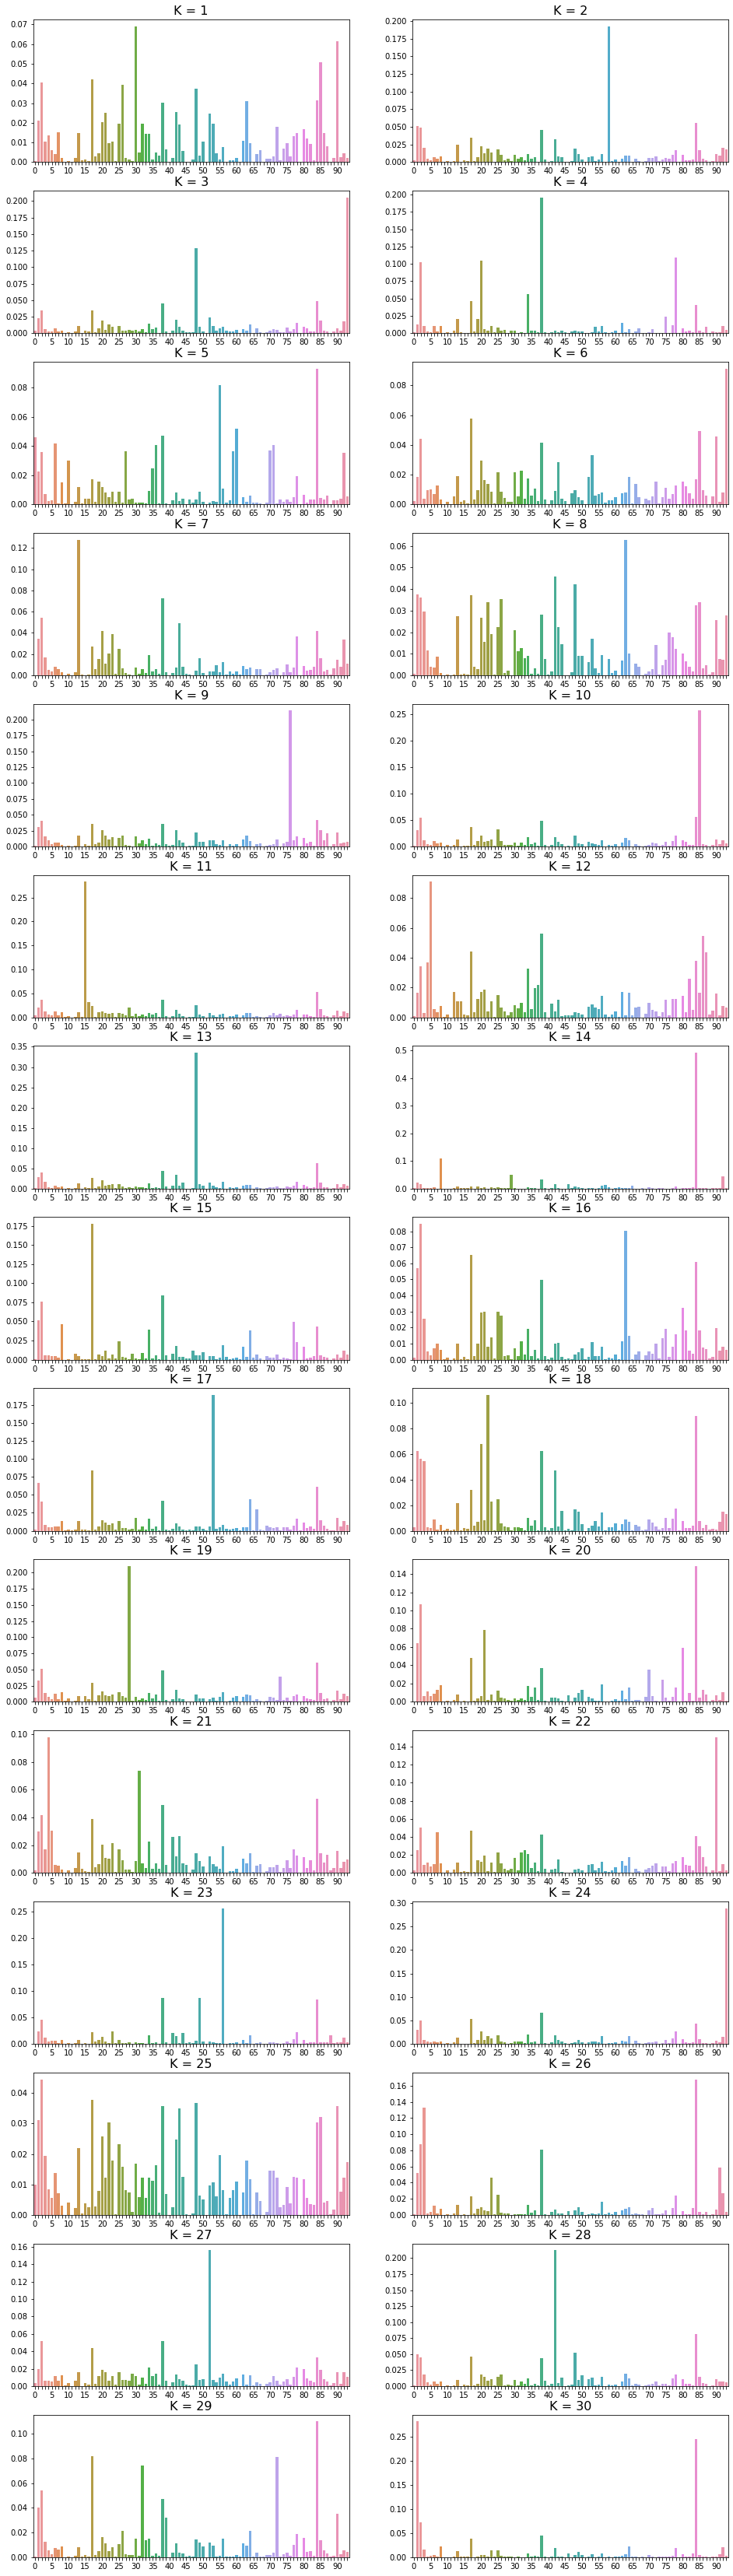

In [69]:
def hide_tick_labels(every_nth, ax):
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)

K, C = best_beta.shape
n_rows = ((K + 1) // 2)
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(16,n_rows*4))
axes = axes.ravel()
for k in range(K):
    sns.barplot(x=list(range(C)), y=best_beta[k], ax=axes[k])
    hide_tick_labels(5, axes[k])
    axes[k].set_title('K = %i' % (k+1), size=16)

## Visualize cluster distances

In [72]:
from sklearn.metrics.pairwise import manhattan_distances

beta_distances = manhattan_distances(best_beta)

In [73]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2, dissimilarity='precomputed')
beta_distances_transformed = embedding.fit_transform(beta_distances)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Dimension 2')

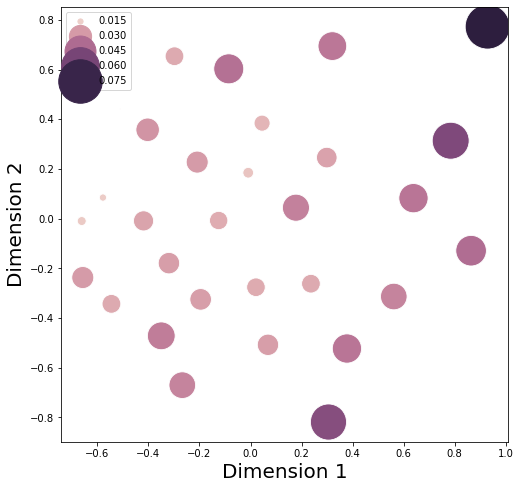

In [74]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x=beta_distances_transformed[:, 0], 
                y=beta_distances_transformed[:, 1],
                size=best_alpha.mean(axis=0),
                hue=best_alpha.mean(axis=0),
                sizes=(1, 2000))
ax.set_xlabel('Dimension 1', size=20)
ax.set_ylabel('Dimension 2', size=20)

## Describe clusters by high lift items

In [ ]:
train_household_key = train_grocery_df.groupby('BASKET_ID').nth(0)['household_key']
best_gamma_df = pd.DataFrame(best_gamma, index=train_household_key)
best_gamma_df.head()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

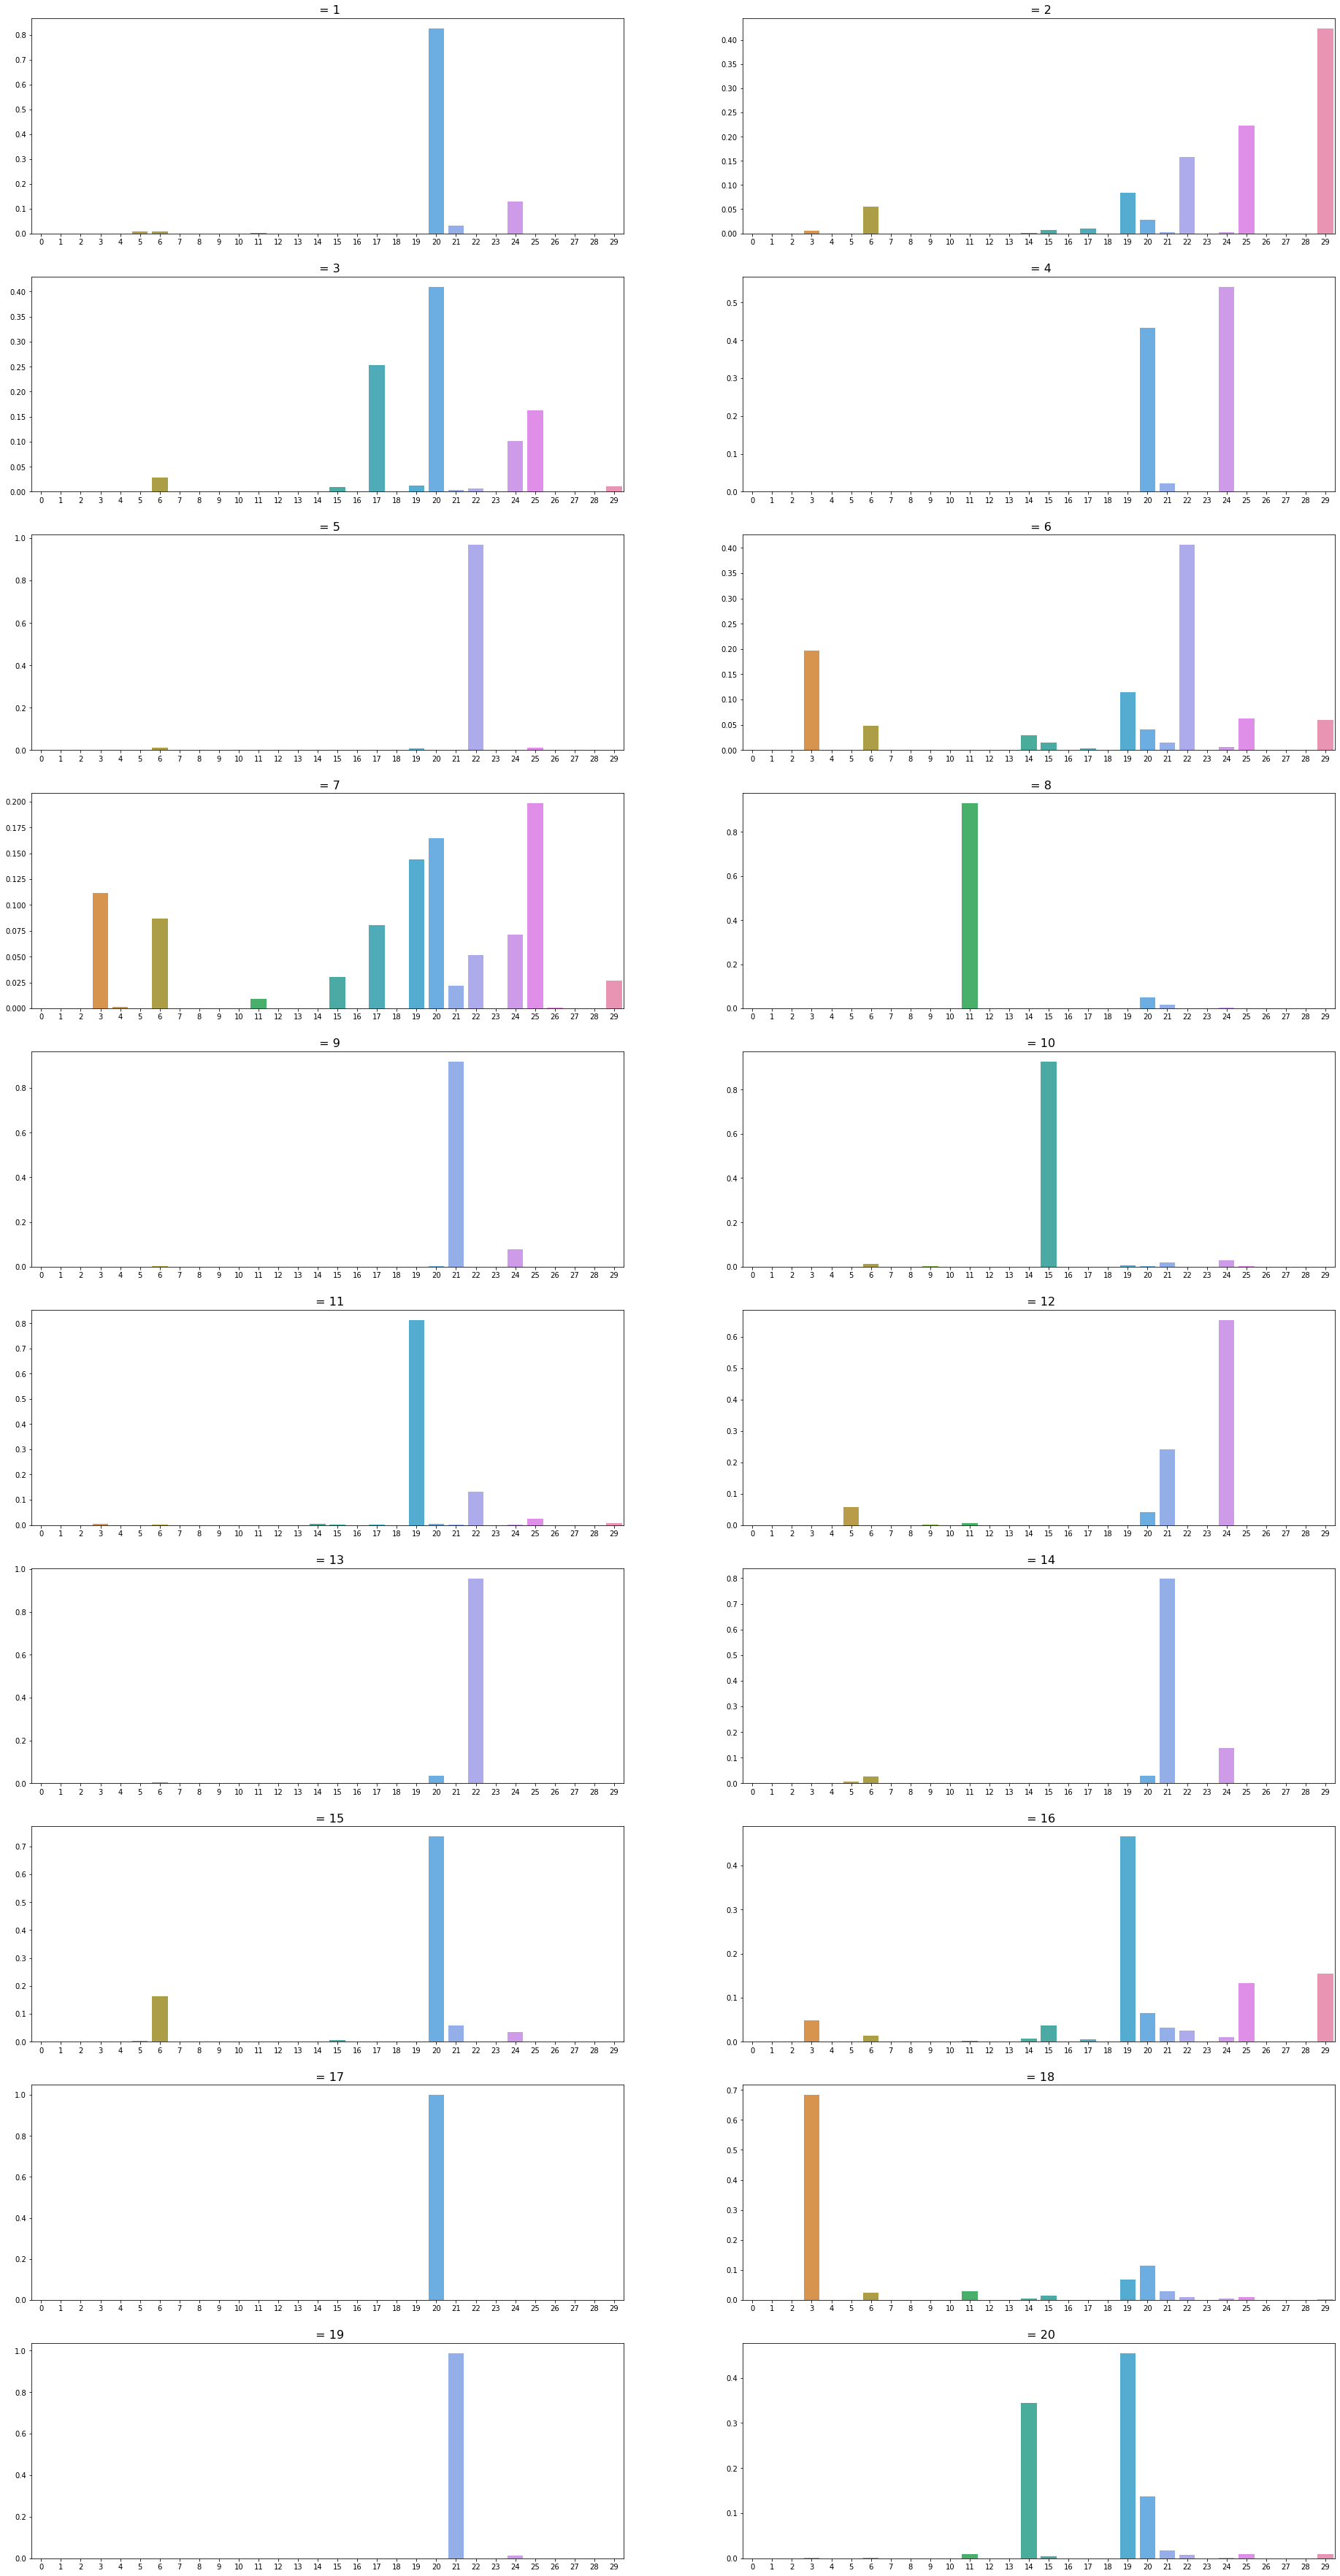

In [75]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(32,64))
for i in range(20):
    sns.barplot(x=list(range(best_gamma.shape[1])), y=best_gamma[i], ax=axes[(i//2)][i%2])
    axes[(i//2)][i%2].set_title(' = %i' % (i+1), size=16)

In [5]:
cluster_weights_by_basket_id = {}
for i, (individual_id, basket_id) in enumerate(train_counts_df.index):
    cluster_weights_by_basket_id[basket_id] = best_gamma[i]

__Compute global product purchase probabilities__

In [65]:
product_counts = train_grocery_df.groupby('PRODUCT_ID')['PRODUCT_ID'].value_counts()
product_counts.index = product_counts.index.droplevel()
product_purchase_prob = product_counts / len(train_grocery_df)

<AxesSubplot:>

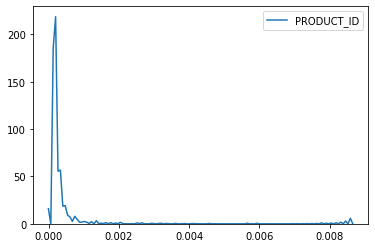

In [66]:
sns.kdeplot(product_purchase_prob)

In [99]:
high_freq_items_prob = product_purchase_prob[product_purchase_prob > 0.0001]
high_freq_items_prob_df = pd.DataFrame(data={'Total purchase prob': high_freq_items_prob})
high_freq_items_prob_df

,Total purchase prob
PRODUCT_ID,
819063,0.000188
819304,0.000174
819330,0.000126
819518,0.000138
819765,0.000346
...,...
15506577,0.000145
15511891,0.000129
15596279,0.000146


In [113]:
total_cluster_weights = best_gamma.sum(axis=0)

products_filepath = '/home/adrien/Téléchargements/dunnhumby/product.csv'
products_df = pd.read_csv(products_filepath)
products_df.set_index('PRODUCT_ID', inplace=True)


def product_prob_for_component(g, k):
    total_product_cluster_weight = 0
    for basket_id in g['BASKET_ID']:
        total_product_cluster_weight += cluster_weights_by_basket_id[basket_id][k]
    return total_product_cluster_weight / total_cluster_weights[k]

def get_high_lift_frequent_items(k):

    product_cluster_purchase_prob = train_grocery_df.groupby('PRODUCT_ID').apply(lambda g: product_prob_for_component(g, k))
    lift = product_cluster_purchase_prob / product_purchase_prob
    lift_df = pd.DataFrame(data={'Lift': lift})
    high_lift_df = lift_df[lift_df.Lift > 10]
    high_freq_and_high_lift = high_freq_items_prob_df.join(high_lift_df, how='inner').sort_values('Lift', ascending=False)
    return high_freq_and_high_lift.join(products_df, how='inner')

In [114]:
cluster_1_high_lift_items_df = get_high_lift_frequent_items(k=0)

In [115]:
cluster_1_high_lift_items_df

,Total purchase prob,Lift,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
PRODUCT_ID,,,,,,,,
1043663,0.000109,105.019379,531,GROCERY,National,CANNED JUICES,APPLE JUICE & CIDER (OVER 50%,46 OZ
983659,0.000100,99.949377,531,GROCERY,National,CANNED JUICES,BLENDED JUICE&COMBINATIONS (OV,46 OZ
1044188,0.000231,66.670954,317,GROCERY,National,CHEESE,NON-IWS SINGLE CHEESE,16 OZ
1104349,0.000200,46.978642,194,GROCERY,National,COLD CEREAL,ADULT CEREAL,15.6 OZ
884686,0.000155,44.989154,794,GROCERY,National,COLD CEREAL,ADULT CEREAL,12 OZ
...,...,...,...,...,...,...,...,...
1072483,0.000114,10.150394,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,TOASTER PASTRIES,14.6 OZ
923746,0.002908,10.132892,69,GROCERY,Private,EGGS,EGGS - LARGE,18 CT
1028891,0.000233,10.069105,1225,GROCERY,National,FLUID MILK PRODUCTS,REFRIGERATED COFFEE CREAMERS,32 OZ


In [117]:
cluster_2_high_lift_items_df = get_high_lift_frequent_items(k=1)

In [118]:
cluster_2_high_lift_items_df

,Total purchase prob,Lift,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
PRODUCT_ID,,,,,,,,
7167219,0.000133,46.251527,544,GROCERY,National,BAG SNACKS,SGL SV/VEND MACH SNACKS CHIP/P,1 OZ
9527158,0.000238,41.941725,544,GROCERY,National,BAG SNACKS,SGL SV/VEND MACH SNACKS CHIP/P,1.0 OZ
6463658,0.000318,40.990963,544,GROCERY,National,BAG SNACKS,SGL SV/VEND MACH SNACKS CHIP/P,1 OZ
7440663,0.000331,40.452413,544,GROCERY,National,BAG SNACKS,SGL SV/VEND MACH SNACKS CHIP/P,.875 OZ
1051305,0.000202,39.783114,544,GROCERY,National,BAG SNACKS,SGL SV/VEND MACH SNACKS CHIP/P,1 OZ
...,...,...,...,...,...,...,...,...
1128900,0.000141,10.036176,69,GROCERY,Private,SOFT DRINKS,SFT DRNK 2 LITER BTL CARB INCL,2 LTR
873964,0.000288,10.034209,69,GROCERY,Private,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
1007191,0.000403,10.006408,69,GROCERY,Private,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ


In [123]:
cluster_3_high_lift_items_df = get_high_lift_frequent_items(k=2)

In [128]:
cluster_3_high_lift_items_df

,Total purchase prob,Lift,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
PRODUCT_ID,,,,,,,,
1036289,0.000128,116.949884,830,GROCERY,National,HISPANIC,MEXICAN SAUCESSALSAPICANTEE,8 OZ
1099905,0.000115,105.110841,830,GROCERY,National,HISPANIC,MEXICAN SAUCESSALSAPICANTEE,16 OZ
1051810,0.000134,101.534489,830,GROCERY,National,HISPANIC,MEXICAN SAUCESSALSAPICANTEE,8 OZ
855138,0.000144,99.752076,1123,GROCERY,National,HISPANIC,MEXICAN BEANS REFRIED,16 OZ
894511,0.000316,97.714973,544,GROCERY,National,HISPANIC,MEXICAN SEASONING MIXES,1.25 OZ
...,...,...,...,...,...,...,...,...
1056509,0.001086,10.119279,69,GROCERY,Private,MILK BY-PRODUCTS,COTTAGE CHEESE,24 OZ
1099945,0.000102,10.081283,436,GROCERY,National,FRZN JCE CONC/DRNKS,FRZN CONC UNDER 50% JUICE,12 OZ
1058404,0.000177,10.062075,1126,GROCERY,National,CHEESE,STRING CHEESE,12 OZ


In [129]:
cluster_4_high_lift_items_df = get_high_lift_frequent_items(k=3)

In [ ]:
cluster_4_high_lift_items_df

In [112]:
high_freq_and_high_lift.join(products_df, how='inner').iloc[:30]

,Total purchase prob,Lift,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
PRODUCT_ID,,,,,,,,
1043663,0.000109,105.019379,531,GROCERY,National,CANNED JUICES,APPLE JUICE & CIDER (OVER 50%,46 OZ
983659,0.000100,99.949377,531,GROCERY,National,CANNED JUICES,BLENDED JUICE&COMBINATIONS (OV,46 OZ
1044188,0.000231,66.670954,317,GROCERY,National,CHEESE,NON-IWS SINGLE CHEESE,16 OZ
1104349,0.000200,46.978642,194,GROCERY,National,COLD CEREAL,ADULT CEREAL,15.6 OZ
884686,0.000155,44.989154,794,GROCERY,National,COLD CEREAL,ADULT CEREAL,12 OZ
1070497,0.000197,44.101861,794,GROCERY,National,COLD CEREAL,ALL FAMILY CEREAL,18 OZ
920109,0.000121,43.483617,1046,GROCERY,National,COLD CEREAL,ADULT CEREAL,19 OZ
1102067,0.000237,42.990957,194,GROCERY,National,COLD CEREAL,ALL FAMILY CEREAL,8.9 OZ
862535,0.000116,38.291432,794,GROCERY,National,COLD CEREAL,ALL FAMILY CEREAL,16.5 OZ


__predictive profiles__

In [35]:
test_counts_df.index = test_counts_df.index.droplevel()

In [52]:
best_alpha_df.index

Int64Index([   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            ...
            2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500],
           dtype='int64', name='household_key', length=172328)

In [147]:
from scipy.special import logsumexp
from scipy.stats import multinomial


best_gamma_df = pd.DataFrame(best_gamma, index=train_household_ids)
best_alpha_df = pd.DataFrame(best_alpha, index=train_household_ids)


def compute_predictive_profile_from_sampling(household_key, complete):
    household_assignments = best_gamma_df[best_gamma_df.index == household_key]
    if len(household_assignments) == 0:
        return 0
    # All assignments are equal, as per the modelization, so we just take the first one
    alpha = best_alpha_df[best_alpha_df.index == household_key].iloc[0]
    
    K, C = best_beta.shape
    n=100
    total = np.zeros((C))
    for i, assignment in household_assignments.iterrows():
        for k in range(K):
            k_samples = alpha[k] * multinomial.rvs(n=100, p=best_beta[k], size=n)
            if complete:
                k_samples *= assignment[k]
            total += k_samples.sum(axis=0)
    probs = total / total.sum()
    return probs

    
def compute_household_test_purchase(household_key):
    test_basket_ids=test_grocery_df.loc[test_grocery_df['household_key'] == household_key, 'BASKET_ID'].unique()
    household_test_counts_df = test_counts_df[test_counts_df.index.isin(test_basket_ids)].sum(axis=0)
    return household_test_counts_df / household_test_counts_df.sum()
    
def plot_prediction_vs_reality(household_key, complete=False):
    fig, axes = plt.subplots(nrows=2, figsize=(32,14))
    axes = axes.ravel()
    
    predictive_probs = compute_predictive_profile_from_sampling(household_key, complete)
    sns.barplot(x=np.arange(predictive_probs.size), y=predictive_probs, ax=axes[0])
    axes[0].set_title('Purchases probabilities prediction for household %s' % str(household_key), size=20)
    axes[0].set_xlabel('Categories', size=20)
    axes[0].set_ylabel('Probability', size=20)
    
    test_probs = compute_household_test_purchase(household_key)
    sns.barplot(x=np.arange(test_probs.size), y=test_probs, ax=axes[1])
    axes[1].set_title('Purchases from the test set for household %s' % str(household_key), size=20)
    axes[1].set_xlabel('Categories', size=20)
    axes[1].set_ylabel('Probability', size=20)

    l1_distance = np.abs(predictive_probs - test_probs).sum()
    plt.text(0.5, -0.25, 'L1 distance between prediction and test data: %.3f' % l1_distance,
             horizontalalignment='center', verticalalignment='center', transform = axes[1].transAxes, size=30)

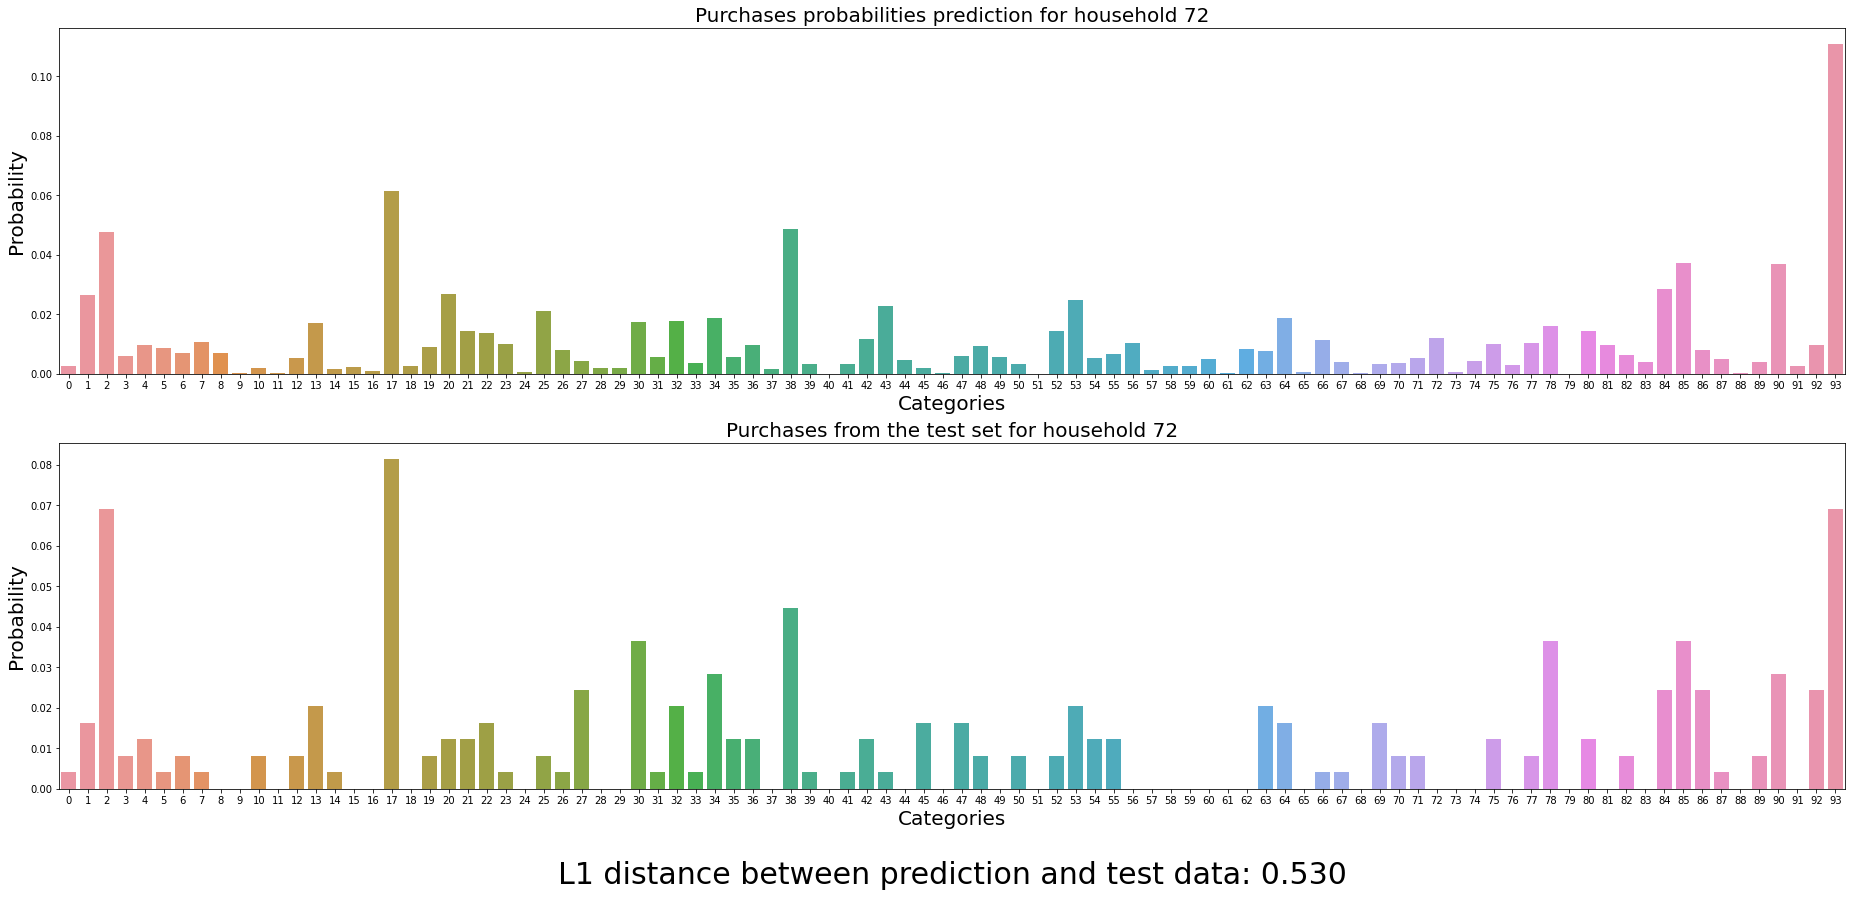

In [148]:
plot_prediction_vs_reality(72, complete=True)

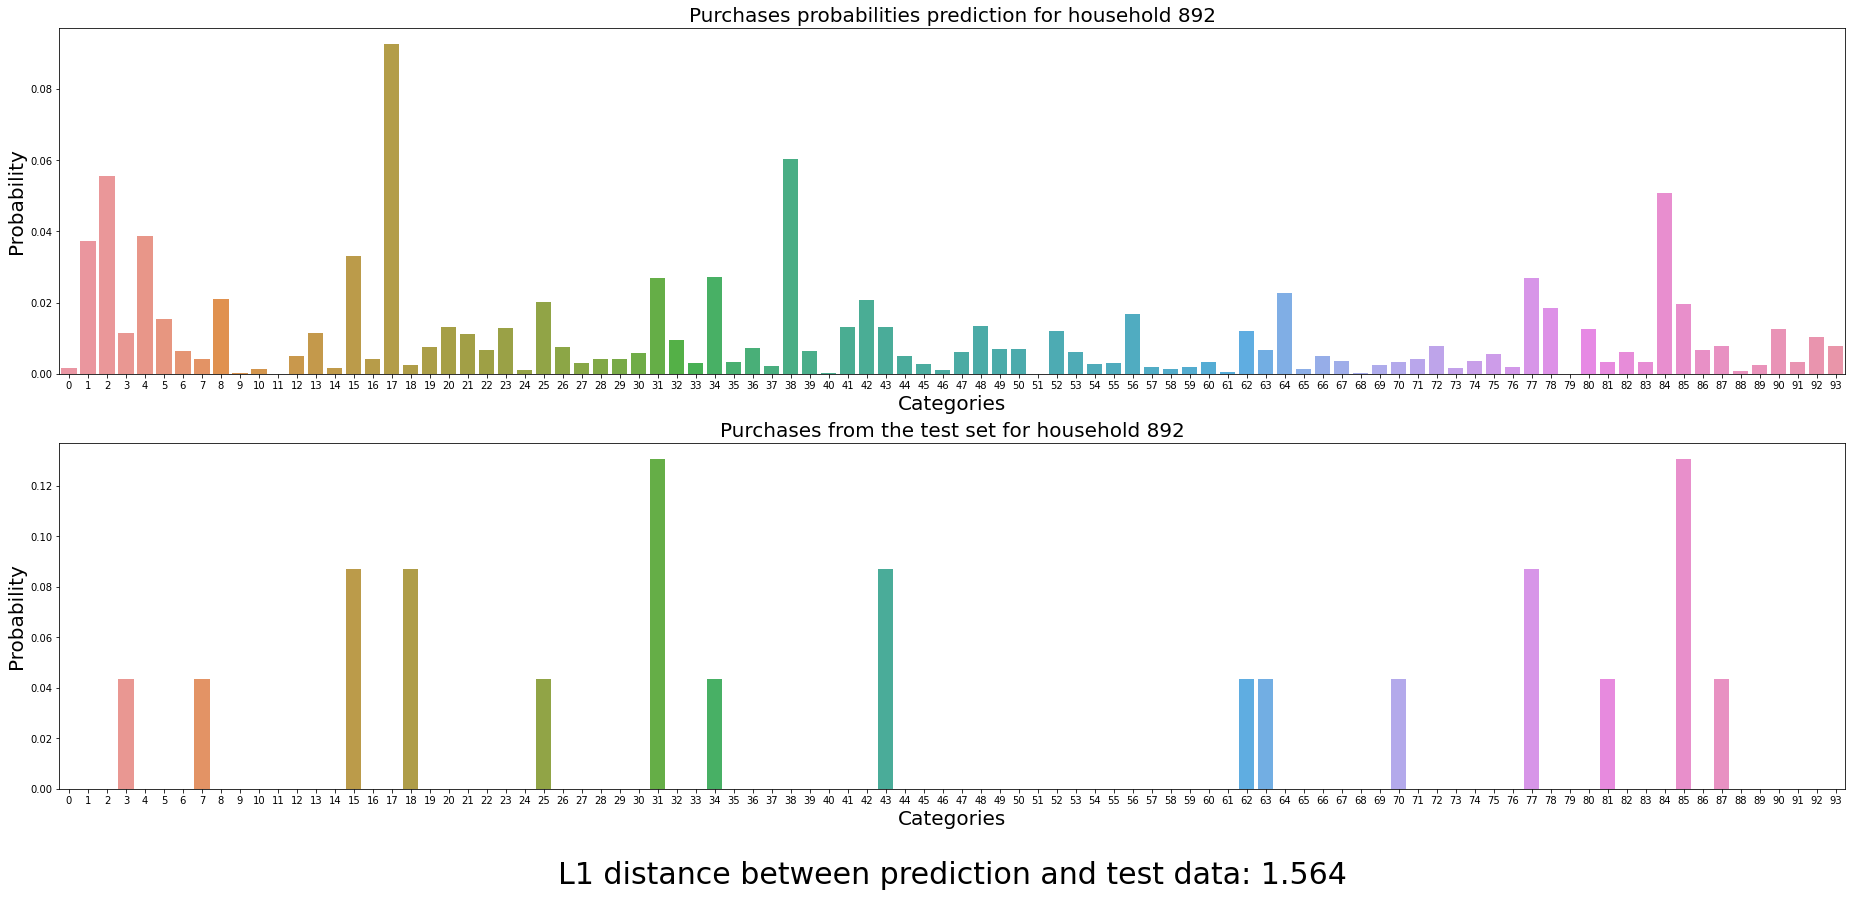

In [149]:
plot_prediction_vs_reality(892, complete=True)

In [150]:
from tqdm import tqdm

unique_test_household_ids = test_grocery_df['household_key'].unique()
predictions_distances = {}
for household_id in tqdm(unique_test_household_ids):
    predictive_probs = compute_predictive_profile_from_sampling(household_id, True)
    test_probs = compute_household_test_purchase(household_id)
    l1_distance = np.abs(predictive_probs - test_probs).sum()
    predictions_distances[household_id] = l1_distance

100%|██████████| 2361/2361 [47:50<00:00,  1.22s/it]  


In [126]:
global_predictions_distances = pickle.load(open('predictions_distances.p', 'rb'))

<ipython-input-151-ae1f5e1546d8>:10: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = predictions_distances[household_id] / global_dist


Text(0, 0.5, 'Error with individuals model')

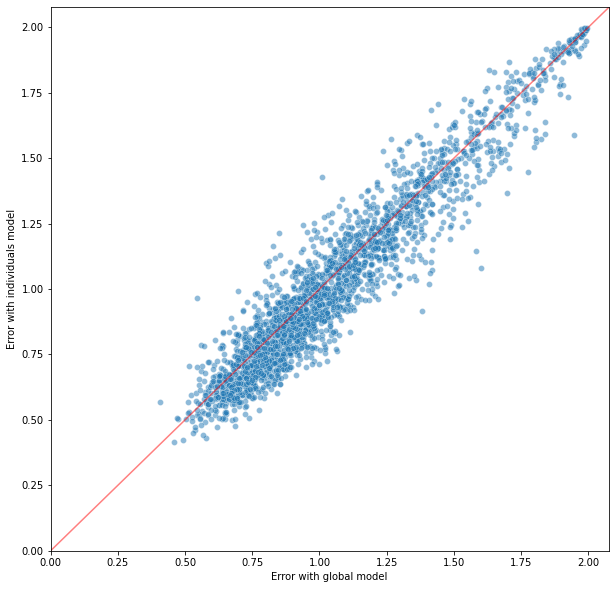

In [151]:
import matplotlib.lines as lines

distances = np.zeros((len(global_predictions_distances), len(global_predictions_distances)))

best_prediction_household_id = None
prev_ratio = float('inf')
for i, (household_id, global_dist) in enumerate(global_predictions_distances.items()):
    distances[i, 0] = global_dist
    distances[i, 1] = predictions_distances[household_id]
    ratio = predictions_distances[household_id] / global_dist
    if ratio < prev_ratio:
        prev_ratio = ratio
        best_prediction_household_id = household_id
distances = distances[distances[:, 0] > 0]

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=distances[:, 0], y=distances[:, 1], alpha=0.5)
ax.set_ybound(0)
ax.set_xbound(0)
l = lines.Line2D([0, 2.1], [0, 2.1], linestyle='-', color='red', alpha=0.5)
ax.add_line(l)
ax.set_xlabel('Error with global model')
ax.set_ylabel('Error with individuals model')

In [152]:
# Pct of predictions with a higher error with the global model than the individual model
(((distances[:, 0] - distances[:, 1]) > 0).sum() / distances.shape[0]) * 100

61.57760814249363